In [1]:
import time, json
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [2]:
searches = 'coffee', 'tea'
path = Path('coffee_or_tea')
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted

In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/Users/maciejgibas/Projects/yupiter-test/.venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings

18

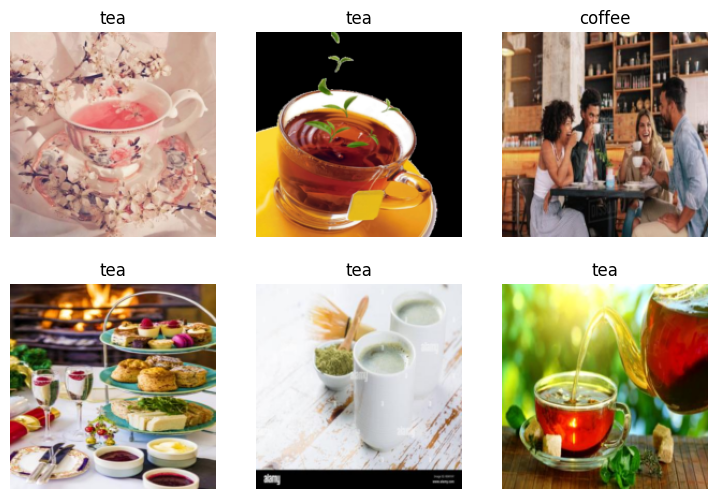

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.175311,0.750485,0.194444,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.597938,0.578860,0.236111,00:02
1,0.387264,0.612645,0.166667,00:02
2,0.264481,0.633461,0.194444,00:02


In [6]:
download_url('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhISEhISEA8PDw8PDxUQEBAQDw0PFREWFhURFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGhAQGisdHR0rKy0tLS0rKy0tLS0rLTctLS0tLS0tLS0tLSstLS0rLS0tLS0tLS0tLS0tLS0tKy0tLf/AABEIAKgBKwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAIFAAEGBwj/xABKEAABAwIBCAUHCAcGBwAAAAABAAIDBBEhBRIxQVFxgZEHEyJh0QYUFVKhscEyQkNTYnKS8BYXI4KTouFUg8LS0/ElRGNzlLLi/8QAGQEAAwEBAQAAAAAAAAAAAAAAAQIDAAQF/8QAKBEAAgICAQQCAgEFAAAAAAAAAAECERIhAwQTMVFBYSKRMhQzUrHB/9oADAMBAAIRAxEAPwB9lXgtdeqhsyK2ZeMo0e1kWwnWGdVonWjOnDaLIVdlMZSO1UzplDrUrjYLRaTVF0pI9Ca9Re5RoonoXqHJJ7kaoeknvXVxnLyeSWemoZVXEo0LldvRFIfc9B6xQe9LGTFLZmWDcUzDT3VbFMrainC5uSy0aMdT2S7mJ2olVc6XFJFsZoNGLLJHrInqMyPlh8A2yI3XpQNutuYQmaQLDulQs9CBUmsuskkBh4jdOhmCVgjT2pTlIMUBzFj40ZqIWpcx6KuVqiGp2WNLS4KqnYlArqD3rC9LzPTIPwS61bjkxSYem6ZuKppEt2dFkyO4TNQ0BRybgEKvkU1TY9gHvCCXID3qOcmdAyYASIjXpASIjZEKGseEi0ZEs16kXLGsIZFEPQyVAORBsfY9akegMeoySKNbLJ6AVD0m5yNO5LgLoh4Oefkk0XTMMZWU8St6WkupcnNiGMLKuZhsk7FdLPQJP0apw6mIZcLZT3TdHKUebJ5GpSo6Q3Ve4mgKLTHmxkhKvp8V01HQXalqmksVzOdFopFGyIrJoyuioaEFSynQABGPICSRykbrFZPOFqqjsUoYyrKnsm7CtN1Y0zFXxtsrCnchNhQy0Lb3KCDI9c3kotDLHKbpLJETIcs6ZJ2K2MSzJKoeVtlymoqS6qvxF8lQ5xQZHroJcnYKnq6exVYzTM4tCjE9TuslWWCk6WyZ7JNnSUlYAEKrqgVQNqyFCSrKVQYbLCSpQ/O1VPnUOuTYC2OFym16ASsTUNY22RTEiSD1IyIYhUhzrFAyBJPnSktSmULBLkLY1IUfOLqkNQVOKdHsirlZbHFEiiS1NJdPtdZRm60UjvY5SxK3gsFRQ1GKfZMuXlVnTBpItzMFkZCqhKUaCbFcnbHU0W/mYdqUYsmWOhWeSACMVaSNaAq8SkiM2rAUdPZqrspQYpmXKAGCrqurzlSTEjdkqKQNQssVQskH1FlXVlWSlix2hctznKxgyVcXsq+kdiuqoJBZVsVo5+bJhGpM0WTCdS6eOmDk9T0YC2d6NVHJVFAWhUlYLLvcqxCxXCZV0lTi9jpWiufKtxdopV9yVcZIoySF0qkrJtDFJSq2hhATkNBYaEvUdlTytjxiCqQLLmMplXdVPguernXVdAn4K170EuKO5l1ERKylRzKNkoYrqNRFZN0+C1VNuinsLVFM9y1no0sJQOqKroi7LSE3RpGpCB9ky+bBSfkrkDJWEpeSVabMnpk8gkjUnME71l0vKjFtAkJEqcRWpGrcAxVk7Eui4oWqydHgk6BWrcQubl42tl4cmhGMG6sI34IZiUXFcc3Z0Ruh6LFMRMxSEEibbOoNFEdBk+qzU/NW3GlckKpOQzGyZCSQarmxQmyXS8xJKnG07DyWcbFyo1OqydqtpGqsqcEVxtBXImQgGKvKKWyoo5QEdtbZFxsdSOsgrwNaablUbVw7q47VKGrJOlbt0Zys6vKNeCFyNcc4p57iQhNpSVNNIYTo6LOK67JVGGgKpp2Bqe9IhutO22CjorCyosqMAQW5ZG1KZQrrhZeR1HRX1UgVJVPCPV1GlU8k1yutQ0c3I6G48Uw2G6UhKciqAEk7+AwRHq7Ijo7hDkqAiRzAoZMDQLzYILqYJ4lAKspE6KZq3I7BEdElJ3WVUrOdi80qG2ZCmcg5yuoiWWLJ1IvSDHozHoOIbsMVKIYqAKLGUl0ZKy1pHWVhHOqNk9kRk5KWc3JFYwovTOEF0qSbIbKDpFx4bOpOkWTJUbrVVxvTMblKSGTLvIUYfMxptjnWzgSzODSRnAaRgvQ8ltcB2oIHAaXRPsb7Mxzf8S8xo5Sy72/KZHK5usXETiFb5E8uQKF888Z7FWac9V2s79m12dZxw06LldvR/wAG6vf/AA4+pbySv4PQzUH+zTD/AMf/ADrYqXaqabnTf6i8wf0o0uoFv3ofAFad0rxfWn+C7/Kq91/4y/RLD7X7PTjWP/ss/Ol/1VB9Y7+yzcTTj/GvMXdLEfrE/wBwk6npZZ82Nzj/ANto97k3ck/Cl+hcftHqEhD8DR3+++l/zFc75R5Mi6uV3m8cRZFI8OZL2w5rSWjNaLG5G1ec1fSpUG+ZG1l9ZPgFDJ3lnUzdZ1jsBDM/D7MTn2xuMc23FMoylpr/AEFSx3Y3HIVY0Wldy7JmTgczrIb6BhT6d4bpSGWPJUMaZac5zQLlum41lvf3Lk5OFuLp2dcOZXtUIxgWTLLAKlZUlE86Nl40uOVnemjdfVWOCo63KJ2puqu5VdTSkrv4EktkOR+idJWknSmaqrNknS0xCtW5Lc8aE88choyaic5PVEpRsuK6KfILhqSTsjkHQuhckKOWSk2AZJgoOkKfjoraVt9IktBVlZ1hTVM8ovmiZhpUrkh0TY5TuFhhUMwpcjRRWSTYKrqpFuadJPkuu2ETibIPKGSpOKEV0IUI0orXILFNBgQ1G5FaUrE5GJUpIaxlpTdMwKnM1k1T1VlOUHRaMy8LcEs5L+eobqhRwZXJFgx6ZieqUVKZhnU5cbDkdDSuvcbWSN5scPiuapqj/hk7NmUWv5wNHwVnQVdpI76OsYDuzhdc/GS2GriOls0T+PbafcuzoVUZL7OXqHbTOblOKHdGkCiGLuOcHdYiZq0QsAhddX0eC9SNnVyX3ZtviuWIXQ+SE3Vukk2MDBvc4H3NKlzf25V6Y8P5I9PfC1XHk9X9XZpd+zMscRBOA627WW788NG5x2C3nMuXDtV/kKpzqdkj9EmUIM2+uOm/bvduHVuG9eZ0vFNTs7ebkTgWWU6Zgmfm4NcQ8DZnAG3tQBC1c1lfLhbM5hOMbYo3ffbG0O/mBQBl47UnL08nJ17HhyrFHV9S1RdStXJnL52rX6QHakXBMbuo62KlbddDk7qwMbLzH9ITtRG+UrhrWfTzYHyI9PqTGdiq54Y+5cKfKZ21Qd5RnagummFcqOqqIW6khJEFQnLxOtQflnvVVwzFc0X2YEaKy5V2WStemjtW7EgZo7HsqBDVyPps7Vr02dqP9PIPcRTveoXXrbuimHVLJxzfBTb0Twa5pP5fBdykjhxZ5A4qNl7J+qWm+vl/l8FtnRJS/XTfy+CbIOzx1oUivZR0TUn103NvgpfqlpPrZubfBazHjcaO7QvXW9E9IPpZubfBE/VTSfWzc2+CV7MeKWuU5FAvXm9FFIMesmPFvgm4+jOkHzpeY8E1mZ4z1dlEle2O6MqI/Om/EPBQHRZQnSZvxjwSuNjRlXk8VBTMLl7EeiehPzpx++D8FOPoqoR8+f8AGPBTlxtj9xHjc0mxByoQKiptomYJhucQ8ex69ml6LKP15/xNPwXmnSjkIUdVE2POMbqVmaXaTm9kgn90KvTxcbTJcrs4VwxUbKTitrqIkCFFwRCoFYxCyu8mMtET68v/AKN/+1TNXtXkB5DU9RQQSTZxkkMrgGvIs0yENwGsgAqfL/HQ0PJ5rT0sk0jIYxnSSuDWDVfWT3AXJ7gV31e6OnjzB2qbJ8Lob4ft5iQah2y7jmxb5XLojkKmpS5tE1xnkHVOmuXmJt8Y4trzbVgLYnCwYk8iqeWFkcpNm2cWxuIaLA5rbjTa53kk7LTjXHG35KP8nSPB5ZnPc57jd73Oe47XONyeZKIwlezt6M6L1ZCPvuRo+jihH0cnGQqfcRSjxCS6HivdmdHmTzpY/wDG5ad0a5P9SQbnusspGZ4SbqNyvdP1bUHqv/iOCBP0aUN7gPA2CU/FHMFHiOcVmcV7QOjWg03fbRbrdfJF/VjQWwEv8X+i2aNizxMPKIHFewy9GFHqMo/fv8ENvRfS/WS8x4LZo1M8gddDN17GejCl+tl5t8EpN0bUo+km4Zvgj3ImxZ5NcrVyvUndHFNqll4hqw9HFN9bL/Kh3oGwkentI2n2qbZO8ngtBizEbtylsagzRrupA96EJO8clJuO3mjYKCZ51KHWvvoG/Gyl1e/mVIDfzKOwaMY5x024XOHEKQJWW7vaVscOZTAJ5ykZN4UC0fkrMNl+KICQl48kRrvzgh52xt+K0ZT6p5rGoYz7a1E1A2oGcT823NbzDsWtmoIalebdNuT+sggnGJhkfG77kjLgniwfiXopadg4qm8rqZs9HPCc0F0Zze57e032gIxlTM1aPmJ61dWtd5P1DHEdU59tcYMgO4t08Ep6Ln+on/gy+C6bRGhRQKd9FVGqCf8Agy+C2MjVJ/5efjDKPgtYAFFAXvYxuLnuaxo2ucbAcyvpHyS8mmxUkDcx7S+IvlD3vjzusIcIpIhi7NaGtIdbX3ry7os8l3eewzT2YynJmzXfKc9oszuFnFp0/NXvvXt1EHcklOh4xFaehbGbgXdawNh2W+q0aGhTfJb+gCKKkKXWtOxRe/kotCXXO2O5BBc932lYOeO7kouIOpI4/Yyf0IOc62g81HOf3jimnjesaUuIbFBIb4g8LqY48Qmi0Ibm/m62JrFZBv4JSecjQ1x42+CsCzchuZuStMZNFO+oefm24oTqmTZ7T4K3kagFh7lNxfsdSXoq8+Q/NPw9pWNhfpvY9wHirJ0Z3IfVnahiHIr307/WQ/N3esfarNzHKIjKGAcgLGya3PwN8HHHu3Jyne8GxDzfG7nAgaMFlmjX7R4rYP5zkykkK1ZF1K8i3WSCzi6+eL437OA0Y6ESKJ7fpCb+s5x97lMX2DmFlj3njdNkgUHaHetdTgiLQBckfaJceZxQWR9xU770VMVoZDRt5kLD94c/BL47TzKiQdt+KOYMRi2PytHe5SH3j7UoJHjV7St9c7XcbiUc0HEOGEnSfaiMYdbvcUl1p2v5qfW/acOSGRsR5ttZW+sHd7Ui1gP0hG8BbELRpkJ5e5MmBodZIDr5JXKkkGaWufZxFrAi/JacQBe5duPwVTV5ajZhmSacezmk8XAIOVBjCzhco5IkikLopHWJuBmOe32aFEPrQNDDxI9i7+LKkT24xyWO1t/cqitbCCSx7m9ztHuWXL7D2zli+v8AVZzKFJT178C5jQdjSSr2StzTjffbAqNRXyYdWGn1tdh3C4unUwYEfJ/J5hBLiXPdpJwV3504aHHmVz7crVFwM0Ea85obwHaTbqgkXIaDvvitkDEsvP3D5x5ojMuOGkX42XOzPecQbe1ChZK7QQf3T4pXMZQOwiy+w6Q4bjdMsyxEdEjhvC5mnybMdicZkp3zrncLrZo2JeOyyBocHd2spikyjn6W2XN+i2g3s+/3SE5CHDAXHNI+QOB0HnLe4b1IzBUJvpIN911JtY4aGnkh3DYF31vcVlwVT+fyepncc1T84LtRbuIKOYMSwfbaONkNzm7Qd39FUywvJuJCN7AgsZUDEFhPe1wug5fQVH7Lpzh38ihuI1kDfYKpJnPymsO2zzhzC06Nx0sb+I+CGQcS1bM3UQdxU8/uPIeKqGNtoBbuI+KkKh32v5VsjYle3L1tLHcVt+Xxqa6+9oW2yN+sty8FIyN9ccf9lPEpf0APlDYYxv5hSHlL9h3I+9RLW63xm3/TB+CmBBrLBuZZDENr0SZ5UfZI4HwRP0mvgGkHvBUI3U98Hs7+wCUw3qPWYdeLLpkn7A2vRBnlA7X7kY5Vf3+xGhhYdBYdzBb3pttGzuP7iODFyXoqHZRdfF1vd71F2WQ3S7EbyAO+xwVs+ji124gBL1GToLC+YB3m1+5Dts2aK/8ASQWNu0RqaXZx3DWsdl9wGItgDtt3adKMMj0l7hsYvje4xWehKS9w2Ia/la9ulZw+w5L0Cg8oLnXqwtY78Sm2ZfaTbNIPfYD3onmNOwfQN1doi27ErJW0w0mn4loF72tfisoP2Zyj6DR5TaRfNB4qTqoG37Np3uAKE2oh0fseEllMZThDmsIaS7ON2Xcxthpe7Q3imp+xbXon2XD5BHEO96E+naRjGSO42Kd85i2C3cMDs1rPOYjqHL+qzgjZM5+uyLGRdgcx3e45uO0CxVU/yfdrLbX1PcL8Cu0cIT6vEuCg6CA3+TsOa5w9xWUaD3DkYsiwj5TR+MeKsKelp2/MzrcfirZ+Sqd2BaCNNi5+J26VnoinGIDRwsFqZskJee0rPo28mi3MpmHLFPqjbwDfFZJkeBxuWtJ0XOccNNkN2RIBqtq7NxwW/I34lmzLsXqgcGqfp+HuHAfBUL8gwHTn85EJ/k5BpAdh993uKOUgYwOqhytE7Q4cQEY1TTrb/KuSjyDGNBI3t7k1Hk1o1u9vijm/QrhH2dCapn2eQQn1DPs+xVIpgPWI3DxRGU42kb2hbJmxQ/1zdjVoPbsHAFJthxNr7wLfFEsRrdbuBPuKKbNSDPnb6t+YS7pR6h4XKYA/JHist3exEAsHg/Nd+F3gsIHqnkfBMcPYtEd3sPitoFizramHl/RQ/c/PJPAfmy1fu9iNI1nEOEQvcNzb6cxuBOgEbUOWKNl35gzWgkusG2A1k30LSxc68nS9BqenzsWxgD7QzOOOkKRlZ2cInNceyQ9r85trkgDThjgtLE/wItsfyc5hBLY48CMcwgEY4+9NFjCdERIJtdhFjrGdaw5rSxLkFrZJ1UBcCNhta+aXaDY3vb3XU5KrR+xaQBfEvFvYtrERdEDVSD5MAI251m32WtfasfWSjF0TLX9ZwzRtN27cFixEFmqSrkcO2yEHPIYGy3uwaD8nT4piapNiG9UHDDEgi/GyxYhkNjsVifIBZ0ccnfG9pJx2ONytkud9E4XBNi0WH++9YsWTsEnQFlSNotqzWfG5UIcosJIJLmtu05oI7Q0i4dhZYsWGoaOUIgMA9wGLrWJA1WF+0e4YqZynGQQDIwgabRg22C5sVixbIGKB+l2dgAzuNyXZzG3LbHE2A12GG0KPpdpPyJQ2xubSXDw4i2botbXfgtrEHNgoxmWodfW92FwcdPKx4rbctw43c4aDbMJ06t/5usWLZDYoyLK8RIGnDE2LRe9vknEDWiSZZiAcbZwAvYFt3dzRa54raxDI2Bjssxjs3bbRjIzDhsUfSzNfVt73PAB3YbbLFi2bDgiIysxw+VGCdr2C/ftsgnKbcO1H35hjdbAas+9+a2sWyGXGhZ2X4xgXOuNYp5LabaS5HGWYxgC+20MkN92aCNPetLEMgOCIuy0Npte3aDgALaTnALfp5p1kgaM17MeF1ixFSYFFEZsptIwIZ/eAke1B8/HrOvoveM6tNsFixZsKgS9JhoweSbi4uy57x2re0IsWW22N8+99rBcd3bKxYtZnBGhl1moPve1nObbffOsFF2XmDaN7c72graxFMGCP/9k=', 'coffee.jpg', show_progress=False)
Image.open('coffee.jpg').to_thumb(256,256)

is_coffee,_,probs = learn.predict(PILImage.create('coffee.jpg'))
print(f"This is a: {is_coffee}.")
print(f"Probability it's a coffee: {probs[0]:.4f}")

download_url('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEBUSEhIVEBUWFRUVFRAVFRUVEBIVFRUWFhUVFRYYHSggGBolHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGy0lHyUtLS0tLS0tLS0tLy0tLS0tLS0tKy4tLS0tLS0tKy0tLS0rLS0tLS0tKy0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAAEDBAYCBwj/xABBEAABAwIDBQUFBAcIAwAAAAABAAIDBBEFEiEGMUFRYRMicYGRFDKhscFCUnLRByNDgpKi4RUzU2LC0tPwFrLi/8QAGgEAAgMBAQAAAAAAAAAAAAAAAgMAAQQFBv/EACsRAAICAQQBBAECBwAAAAAAAAABAhEDBBIhMUETIlFhcQWRIzJCUrHh8P/aAAwDAQACEQMRAD8A9h7ROJFCnTKMimyftE+dQBdBVQSmybOlmUSV1VBb2TZkxcorp7qUTeOSqtXuVkqvU7lJdB4+zKY0zehtA/VHcXju0rN0Zs4hc3IvednE7gaajKLQoNQlGYE+HRz83ZMCoZyplWqCjfQuPYExF6z9QdUdxEoDPvWLKdTTjUzbuC0ULNEHw2O5R+FmiLAyZ+RNNlM2ZIR6KjNJZbk+DnTjyNXyqzg1UMnJBqqe6qU9WWjQoW+bKSNXXYllYTfgvOsVx65cLqzjOIPc0i9tF5zXVbwSDfehnPgKMeQ2+tappqgPa3wCyPtJRHDazS3WyRurkc0aC1iMo4I/spOQJB4FDsLdmbYb0dwynDM3MolntgPFwZzb45oj0XmcjV6XthYsIvryXmkhsbJu+3wL2pEJjS7JdZwn7QK7ZKic9knT9qEylslI+w8qVl3ZIBarMWw5sku7JWVE2nKVl3ZMoXtOUk5SClk2iKrTlWiFBK1DIZBAavFwVkgLSkLY1zdCshVC0qw5lydTA+DQ0BRiAoFQv0CMQSI4GXMuS4Sqs5Xb5VVqJUTYuK5A2JFBZN6LV7kMcNViys6uBcFrCffWkYxZvDtHLRiUAJmAHP2duGiA10tjqi0lUFl8Wqu8tXgxvshqpxYoH7W4PtwK2uCYY17Q4i91eqtn43jVo8Uai2KckmYTsHP3IDjOzrveHovUaTB2A2slW4U225R47XJanyeCz0uU2KgDy03C3O1WFNa+40WSnpljl7XTNSqSLmF48WH6o5FtKQbu1HNYx1N1XPs55oHGJT3B7FsT7S5vp4rJVBu4lXXU55qPsU3G1ECWNsoEJsqIdgE3st071ED6DB+VJEPYklPVRXoyPr2ySia9StWlMzOhJJ7J7KFcHKVk9k9lCHGVKy7suSpRBnOA6KlNWs3BwJ5BdVeHslN3PO73L2Ckpoomd1uUW8FVNlbqBdWHEaNJ8lmq+lfmByEdbL0JzxZA8ZqLDl80rJiTNGLM06AVLfcicJPNCm1ZJ0Uzaw8kCxsPI7CxYTxXMlI7qpMPqbjciPao/TEKVMzFVR87oa+Ft9619eAWlYPEbiQ2v6rPkwmzFmYTp4Re6JAtt71lmoJHAbz6qnW1728D6q8eKi8mSzUVDG29/wCKB1eGZjcOus3U49KNLFF8PxFzw3Q363WhQbM7nRs9nn5Iw13BHTWRgb1RwqAOaCQr5oWkahNUJR4EOSYOkcwm4NlxXROI5+C4xCnytJa7LbdqgTMWqGuuXNI/Df5WVSe3stJvoz21NG++oLeVwQsXU0Tr7l7lh2KMl95rTz1sPRyym3YoobPZla4mzo2206kDcsuTGpXKLNEMjjw0eWOpXcl02mW5dgzXAOFiCLhWINlARcrDkkoq2a4XJ8HnstNoqD47L0eu2aDVFT4Ey17Anw3IVmSVrkPa7pnnwjHVWoadpW4lwNhGoHohsmFsHJWpymipPaAfZGpIwaNiSmyYPqo96pnXCttVKjjsFfYF3GqOPF2zoBKySdAMGsmITpirKYxXDiuio3K0CwRLXStfrlczd3hr6oqxgcNWt16X+aoV4Bid0cfmmlxmGKNpkeG6c9b8lbpKylyWnYbDv7JgPMNA+Sr1NOGghtmDjbu/QqOLHQ8Xjikfus7KWtPUE7x1CHV2ISkECLKN3e4+Qv0QSm64sOKVleuw0u07eVh/yvJ+YtyVJ2Cv1tXyi33mRu37t7U82LOaTmaTqdb6a26dFD/aziPdvfkdPPqs7mzQkqOhg9YPcxAecLB8gnfh+KD3a6N3jHb5BdtxF/Bp+YXRxOT7vhwQ7/yT9gZU0mL8aqI/uO/2IRNh2Jk6ywHrb/4WzhrC5t3adOHp6IdU4mLnS/S2h1P0IVOXkNP6Mw2gxLhPT+F2/VqjlwbEzvkhPmz/AGrTjEGH9i30SbWR8Iy38OipTXwyN/gyLtm8QOpMJ63Z+Su0+B4qN0kQtu9w/wChaduJN5H/AL5K1FXNO7RMjOPywG38ICU9FjTRpUsA6Nb/AMRTyUmM7jXZfIf8K0D6l3O2l7jlzUZqSeI6/Mnf/wB+ROvl/uRS+l+yMxNg+KO0fiBtyGn+kKKHZ6pDu9WSHp3rW8nrXGS5AFyD9oWcQdBqBrx8gDchT1MJbYEWva7A4XzW3HlcXP5KyjHTbHsdmPtUgNtxDn+hcUIwvZdrnEzB3Zh1nWcMz+V7BbfFZgAGAbyBfdvvvJ3Ws481jNr8UkhY2CG4kkOtt4Atutv0sLpa5Yb4QQi0eGNu1oNmt32AWyDQGgdFmsDp3mFj5u7IRcsykHx1Rr207hG49Q5nyuufq8Eslbf8o16bLGF2UsfFoyVmaWvc3hdH8Ze94y5HN8QhcdGg0+F441NBZsqnK4simxMke7ZDKmpujcmHc9FQqMPW6DilwZJbn2A3PKSMNwlJXvQNM9tjapguGhSLezHFUJJJJUGJMU6RVEOSo3qQqKQq7KSM/jGMxQF7ZniMGxDj7uum/wAkMwjCqd8onknZN9xt7saov0j0PawGw1y382m/1K8fqg6NwLXOjNhq1xafUJU8+x8objwOa4Z9Lxubbu28lHOwHhdfPtFtPXRkFlU49Hhr/i4EojS/pBrO1aaiZ7ohfMyIMY92mgzFugva/RDHVwbClosseTe7SSkODQANTuCjw9umqxTtq6aTNn9szGwa4SxnWzcx1FrXBsNdHE34KxLtXTta0xTytNm5mmPtW37uZoL8puO9rcAkCwsboHJN3YeySVUzfEgBV5JAFkI9qWuY21VDns4uEkcrGiwFmtsLklxI8ibAIb/54DviPiL2PgbnRRzSKWKTNlVS6IYTc71nH7axnexw8Ln6Llu10F9Q8fuoFK2M2NI1kY6lWGWWVj2tpvvOH7v9VI7a6m+84/u/1TfUghTxTfSNU0N5J9OCyJ2ygG4OP7pUL9tG/Zicf4kLyQLWnyvwamuqntacpWKrsfnDiM5HrzurjdsCRY0xd55fzQevqDK67adrPGRxPzSMmSHhmnFpMv8Aay9h+1ssbrvOdp/jHDun6LaYdjYewyXJuAC43zOtuvrw8V5k6gkcNzG9bucR8lZjoZsuX2hzW/daLD5qserxwXuYc/0/NJ+2JtsfxrspYwG9pmbe9gctiOe43shWyTjWYu17t13lo00s0mwusVNSEZz2jzl4lx11Wj2LwmSYsmjkMJiffOL579D4fNOjljJtmbNhnBKLPQaluJukcIqRjQCQ17ixmYDiBe/wQ3FcaxKjI7enzNIveIlw+VlqTjFRlAL7kD3srcx+GiEV47UESFzv3iPMW3IZTxfYMVk+jjZ/bGnqu6QM3FtssjfFm4+S09LTRh4flDw4aPGp/r815FtBs82MiSNzmvzd15Olz9hzt4vwJ08FuNg8eM0ZjlNpGEB99CRubIRwcDZruY14JcnHbT5i+PwE007XDNrX4Yx7NwII0P1CxFbhjmg3G6638EmUWOgINhycNHD6+qAzjMXX3arIoelkcF0Mx+9cmHJKSapac7rbrlJaAT2ALpcBdBdVmBDp0ydUEMmKdMVCHDlBKVO5VpVTLQHxyPNF4fXT6rxfa6ANeLL3CYZmubzC8Z23H6z1WXPzBM16d1JozcTtyiqBYp4joV1VjcViXEjq9wK6lduUKsW7qKRMcbsruXN105cowdp0CkSnsmsqDURAqZiiAViMIZDsceSNynhCiI1VuJqCT4HY4XIsRNVoKGIKZouskmbkqRKrkjLX6D6KOmhu4DqFaxcZY3Hy9VmlL3KJUl5M3HEXRv6kD6r0vZCg7KkZpv1PmsRhVOXiOJurpH/M2v6L2qDDQ2NrLaNAHwXT08Xkk/hHn9fJRUV5AjWXK4qYNETFIGv0Khq2iy2RxX2c31KMhiRaQ6N4u1wII8UI2REjKh4eCHNY9jz94DQH+E3VvaAntNFFgWKCR7yNczX68SD3W/BK9PZcX0xzybqfwenVdSTRGXcQ2OT1ADvqspNjZcLDRaPE4yzDJGjU9nHGB10v8155HC9vvBNyQvbJ90KhOk0i4ZgknbFokl7SWetAroKuHp+0XVow7ixdOFACpGlU0WpHaYprpiVVBWM5VplO4qCYoZLgKLB7jqvLP0j4cWyl/Am/r/W69TkCzO3tGH0+YWJbv8D/AFss7Vpo0Re1pnizd9uamlF2BR1DCHeCsxsux1vELnydcnawe5NA5WodWqs4KSnfYo5covE6lycPCjUz96jIRIko8nTQnskwLqypsbGPAwCmbuXACka1A2Nihmt1V+NirxxotT0+gSMs6NWGBxFEr1PTqzS0aKUtBdc7LqEjTtSVsr4XTd4HxKo7TaBreLiTb5LVwUgYCSeCz0+WWdzz7rN3L/u9ZsOXdk3eEZcuRNNIv/o5wu9QJHa5Bp0J0H1Xqr5AsDs9IIYyeLtVdmxc8CvS6KW3Fb7fJ5nXS35eOlwGa6YA3QGvr1VfWOcd5PRdY1h0sVI+b9pbuNOuW/H8S0xcpuomR0uzHbT19ndhH3ppBZ3EQsI1P4iPRHdh8Bs4G2gt8Nw+qobKbLOc7M/33aySHXXfYHn8l6U6WKhgD3DXdHHxcefh1VcTd+F/1hP2qvJJj0uVrYhw7zvE7lkcWkAFyrDMZD7l7SSTcnqUExx4fuBHmmSyRa4FKLsp/wBrNGiSCOi1TpFjj22O53q3GxKKKynAXUbOeM1q7CYJ0IS4EuSU5VaSW5sFERseacN3+iHT1bjuFlfFJfUpy1jeCukRNgOaN55lRMpC4FrxoUTrq4AaIBU4g7ggcUOi2zyra7DTDO5p56HmOCo4W/W3l5Fb7a2i9oizgd9u/mQvN2EseuZqsXf2dbQ56avwNXQ5JCPRQI1i0OeISDe3Q+CCpGKe6J0MsNs/rtD3T2XKlARskeRNCeyka3RLKgs0KIzQpmNTNarMbEuUh0Ijwx3IWppKSwCC4dFeRvitaxlguZq8tUka8ftRxFCp/aQwKtNUAdSpsOoHSHM7csEqrdLoHJJVyPVSu7F0jtBwHE8llaCrMkzIGcXXcefFEtusTDS2Bu4aut8kP2Wwie/tbIzlad/McbDj4rp6DBePe13yjjazUV7UeguphoPJO3Di4ho1J4KxhbZprERGO/2nb/ILT00EcDdTdx3ne4r0OHHuSfg4OWe115BVHgAY2/2+Dvu+CrVVMXgRB7nNBu+Um7nH7rL/AD4IzPUOkOVoIB4faPjyCs01EI9TZzuA+y38ytUktuyK/IiLae6QMeYqSIOeLcI4R7zj1+pWPrp5J5TLJqeA4NHADotvUYe2Z5L+8evBDqrCiw91twuXroZ0v4atI6Gl9O/f2ZWSSNu828kNra6PgUSx2n0PAjhxWVmgKz4M8pR5GZcKUuBnzNuko/ZymT9wrYe+ArpRgrtdo5I90rpJiVRCnidVkYSOAPwF02He4DvJ1JSrHs0bJo1/dud1zwuqcZdCezfu+y7g4fmiXwQu1VcGoJPWklTT2cdFVNO5QOKOXi4VKRgup6mcNGuiCVWLNBsEI1F5wA8OKz21uzDDF28AuPtNHDqFfgnznf6opR1IjBDu807wlzgpKmFGTi7R5hQVAYDHIO6Ra/1QiojyuLd/I8xwXoG0uzTReWHVh1sPs/0WKnpSTlI14FciWL0pu/J28Op9WCj5QPBU0aQpnB2UjXkrccGUa+HgqlJGnFF+TmIaJKcRBMKZK3I1qxRhXImJqanRGGmudAs+TIkaIIakkyOBtchGIWTy7m5RzOisbO4eC8uIBsN/UrVw0y4+q1cYypLkXkz7OALQYEBq85j8EQxSpbTQOkOlhoOZ4IuyEAXPBeebRV5rZzGw2hjPedwc4cFm0sMmszJeF2c7Lqf6pdIzMNNLWVAAuS91yen5L3TBGiKBkT2ABjQ0GwsQB81h9kq+lp2kgtMh013gcAFqIHTVFnAEN6jK23z+C9xpFGPK/FHG1W6b93HkL1WIAizPDuj4BKnoHuN3dwczq4+XDzXOH0BjNybf5Wor24AW+pS7MVxj0KGAMFmi3M8T4lcVLgxpc42AChlxeJvvPAQ6OsbVHX+6B3fftz6dESVAvkI4ZH3c/F2vlwVx7VF7UwD3gB6IVW42S/soG9s4i+YHuN/EUKVBylYD24o8rDIzeN/UdV5w/Ex0XpO036milfM/O9wPQAkWDWjxXhdZmDt6Rn08XU1xY3BmlW1mnOJjokshndzSSPQQ71GfUwK7uoGuXYK6dHNJLpiVzdNdVRCGupWSxljxcELI4jis1Czs543VUH2Zt7mDgH8dPvBbFxVedoIsQCDwOoKKiGTwvFIajvU0oceMLiGyjwvvRtk+mV3dPI6FZfHtgoZCZID2D9+l8l/Aat8vRApK3FaNuV49pjG5zh2zR52zD0Hiq4/ASsMY5K7NoC4E2uBdUaOlDjqR56IdBtpE4frIXxniYnZ2eJY83H8YRSi2po3aCZn4ZA6N3qQW/wAyXtsaptFuSmDRoPRQkm1zdEKevpz3mEX/ABAs/iaS34obi9Xdum/mLWN/BBO4odjqTCmzmIMJfE4ggjceuixW2lLGyXud034blfgiyODibH4nmhW0UwL7O73zuEnIt+MZF7MnAKmpnBnaNfn+8L94f0U0Dw8XtfSxHUbvqoOzdHq27WvbpmvlcOl1NhmE1T79lE6TjoL7tVyXjbR2YaqK74Om5ORClY1nDeed1J/ZFU24dA8WJB7pNiN+7xU8WHS7yxzfFrh9EiacezTDUwflCp2lEqaJynoMGe4X1/hd+S01BsrUXGaM26lo+qwzcp3si3+E2Nlq8UFzIl2ao7RknS5+QRrM1vXoFPHhEob9hoA3XPyA+qs0uDggOe8no2wH1WBfo+t1E3LZS++P9nIzavHKTbZiNoK+eaZlHE0xdpvkNvdHvHToi1JsbFHHlAzDeRuuePFUcWpsmIOOa4awFvNt76Ivs9jjjJ2T+9fc7iPHpovX/pf6dHS4kpJbvNdHM1OoeT+XohGF08Yu2JjSP8ovfqoanGJ2aNA6cj6LSy0DZHkuFrjzWex6Bsd2m5B3EaO6ea66VdGXdfYJ/wDLp45B2sfd5t/qtHhWLe0ag2HVZukpaiQZQ0vA3OeBu8UQhwh7CD2rQR9houfBUmwmo0FsRw+N4N7X5rOUsdSxx7IhzQ62UXJH0+KtVNLVyvAbcN4uIOg8FpKUNhjDAW3G8uNtedgrcNz4AWZQRQbQySNHa3BP2QfmeStOngpGZGAvef2cYzSOPUDcOpVSsxRgBc+Vzm8Q39Uzzde/8wWLx7bmzTHTZWji5rRbxvxPXVE8ajzLgWsksjqKAu2WPz1Ep7UBjGHuw3vY83EbysfUyFxJO8q3W1BeS5xJJ3k6kofIVlnk3vjo2wxemueyO6SZJVRZ9RBdKNsifOtdGI7umJXOdcucpRBOKic5Jz1XkeiLQ73qlVUofxLDzH1HFTFyYOQhmMx7BOMsDZh/iNAzj6j1WPqcIpXGwe+M8nd4fz6/Feq1tXbRZuuoIZTq2x5hC0WYkbNuBBjljfy1LHehur8TZ292SMvH7rj5FW6vZ8MN2u9DYqShp7aEvPg5ub43+SqimMMThDMkntUVuoeweAcNB5oVWR07zds7n34PZY+oWpa6cD9WHvH3ZWscPK1iFlMZp3OcT2IYeQkH/q7Ueqpx+iKX2cupi5oaJBYaDUXWl2bxuWkA/ViQWte7m6fwlYxkM7bFpe09D/tJROnxWqbbM6/42gfF4SY4oR6VDXknLt2a+DazKJGujd33l7TnaS2+8a2Xbdq4yA17XjmQGOv/ADBYp2LSOvcM38mD5BQ9rnOu/obI5JVRE3dnrtBtTR3vd+nDsxy6OKOU+01O/cX+bbLx3C8LbIf7yRp6E/ktrS7GuDQRLPu/xGgfAK4JLwDJs2smLROBHedfhlKTKvuZY22sLAG7QPQFY6TZyZn7aQDmZXH4ALuEtj9+qv0Pan5uTUoim5E7tmpXve+SdgLzc2a426a2RPCsHjgN+0zHibanpv0CFU+N097dqTbiWtA9XOVwbQ0/B7T4Wcf5GlEooBuYZfUMvfMT0sfyVapcyUjMwutu32+CEvxUu1BncOTIngepAUX9oybhTPPWV8Y+pPwRcAU/k0EkkbRYgDobAejiFSOKW0Y1p/CCfiBl+KB11XUZSXGmpxzJdIfTuhYvFMZ1saySXm2IBjPgL/FWklyVtvyzaYxtQIgTI+3+XM1p9BmKyGKbYTOaTHH2Y4PeL+mfT0CCPxMN1iia0/4ju/J6uug9VK57sz3Fx5k3S56iuh+PTLtolrMQklN5JHSfiJIHgOCh7RR2XLiufklKbts6ONRiuBPeoHlJ7lA5yuCBmzu6SjzJJgs+mmvUmdJJbjEc9ouTIkkoQidIoXuSSVMIgfJZcvlsEkkJZncUqkLZV6p0lQSIquqJQKtqCnSVMKgRJiEjD3XeRAIXD9on/ajjPUAg/O3wTJIbZNqJKbawD3o/g0/kjdHtlTfaDW+MTz/6SJJId7smxFqTHqOTjGf3KgfMlDKyop3OuGReAa8D4tSSTGilGivHJFfSOPyB/JE6bEmtFsrbcu9ZJJAm0E4ploYnB9qKI+MZd8yr9FjFM39nE3wpgfjnSSRp2+RbiFotsKVm8tH4acD/AFFKb9JdM33Q93g0N+ZSSVylt6QKxp9gus/SWXf3cJ8Xv+gQOt23q37nCMcmDX1KSSF5JBrHFAKqxCSQ3fI5/iSVEx6SSBtvsNKizm0VWQpJIJBxOAVy9JJLoYitIoHFJJEkUzjMkkkiBP/Z', 'tea.jpg', show_progress=False)
Image.open('tea.jpg').to_thumb(256,256)
is_tea,_,probs = learn.predict(PILImage.create('tea.jpg'))
print(f"This is a: {is_tea}.")
print(f"Probability it's a tea: {probs[0]:.4f}")

This is a: coffee.
Probability it's a coffee: 0.9989


This is a: tea.
Probability it's a tea: 0.0011
